In [4]:
import os

import numpy as np
import pandas as pd

from importlib import reload

from src import constants as Con

from src.predictive_modeling.answer_loc.answer_loc_models import LastLocationBaseline
from src.predictive_modeling.answer_loc.answer_loc_eval import evaluate_models_on_answer_location
from src.predictive_modeling.answer_loc.answer_loc_viz import show_model_results, plot_confusion_heatmap

In [5]:
hunters = pd.read_csv("../data/hunters.csv")
gatherers = pd.read_csv("../data/gatherers.csv")

In [7]:
models = [
    LastLocationBaseline(),
]

In [8]:
results_hunters = evaluate_models_on_answer_location(
    df=hunters,
    models=models,
    group_cols=(Con.PARTICIPANT_ID, Con.TRIAL_ID),
    split_group_col=Con.PARTICIPANT_ID,
    last_loc_col=Con.LAST_VISITED_LOCATION,
    target_col=Con.SELECTED_ANSWER_POSITION_COLUMN,
    test_size=0.2,
    random_state=42,
)
show_model_results(results_hunters)


MODEL: last_location
----------------------------------------------------------------------
Number of test trials: 1944
Accuracy: 0.673

Confusion Matrix:
        pred_0  pred_1  pred_2  pred_3
true_0     367      54      42      32
true_1      66     328      35      33
true_2      56      71     337      47
true_3      61      85      53     277

True label distribution (label → count):
0    495
1    462
2    511
3    476

Prediction distribution (label → count):
0    550
1    538
2    467
3    389



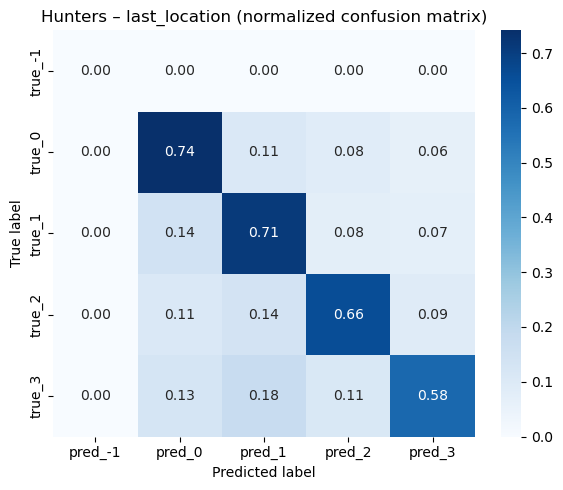

In [9]:
for name, res in results_hunters.items():
    plot_confusion_heatmap(
        y_true=res.y_true,
        y_pred=res.y_pred,
        labels=(0, 1, 2, 3),
        include_minus1=True,
        normalize=True,
        title=f"Hunters – {name} (normalized confusion matrix)",
    )

In [10]:
results_gatherers = evaluate_models_on_answer_location(
    df=gatherers,
    models=models,
    group_cols=(Con.PARTICIPANT_ID, Con.TRIAL_ID),
    split_group_col=Con.PARTICIPANT_ID,
    last_loc_col=Con.LAST_VISITED_LOCATION,
    target_col=Con.SELECTED_ANSWER_POSITION_COLUMN,
    test_size=0.2,
    random_state=42,
)
show_model_results(results_gatherers)


MODEL: last_location
----------------------------------------------------------------------
Number of test trials: 1944
Accuracy: 0.707

Confusion Matrix:
        pred_0  pred_1  pred_2  pred_3
true_0     384      67      25      21
true_1      36     380      24      34
true_2      63      63     314      51
true_3      64      79      42     297

True label distribution (label → count):
0    497
1    474
2    491
3    482

Prediction distribution (label → count):
0    547
1    589
2    405
3    403



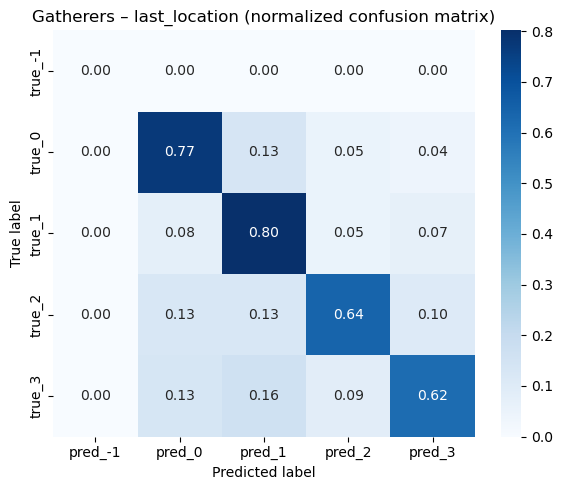

In [11]:
for name, res in results_gatherers.items():
    plot_confusion_heatmap(
        y_true=res.y_true,
        y_pred=res.y_pred,
        labels=(0, 1, 2, 3),
        include_minus1=True,
        normalize=True,
        title=f"Gatherers – {name} (normalized confusion matrix)",
    )